<a href="https://colab.research.google.com/github/anna-nm/fakenewsdetection/blob/main/fakenewsdetector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DATASET



In [ ]:
#Goal of the project, why important
#https://www.kaggle.com/datasets/algord/fake-news/data

# New dataset
#https://www.kaggle.com/datasets/bhavikjikadara/fake-news-detection/data

Checkpoint 2:
- individual words being good indicators
- sequence models (transformer and RNNs)
- SVM vs Naives Bayes - try some more scikit models
- individual words are important! (frequency, not word meaning)
- word count visualizations
- Notebook 3.2 in DIDA 310 (relative word count)- for Naive Bayes and SVM
- build an ensemble model?
- Hugging Face, Chpt 2 FastAI txtbook or scikit-learn


Run your own key and password

In [52]:
# ANNA
%env KAGGLE_USERNAME=annanguyeen
%env KAGGLE_KEY=3eeaefc1b64f8f16063ed8e81910881c

env: KAGGLE_USERNAME=annanguyeen
env: KAGGLE_KEY=3eeaefc1b64f8f16063ed8e81910881c


In [ ]:
# AIDAN
%env KAGGLE_USERNAME=aidan123456
%env KAGGLE_KEY=c14b60ef82427afa1cdf686430f9dccc

In [ ]:
#Aiesha
%env KAGGLE_USERNAME= aieshaayub
%env KAGGLE_KEY= 9e44141b18d723294901dc1ce3792b80

env: KAGGLE_USERNAME=aieshaayub
env: KAGGLE_KEY=9e44141b18d723294901dc1ce3792b80


In [ ]:
#Jialene
%env KAGGLE_USERNAME=jialenewestcott
%env KAGGLE_KEY=74e80c63ef591fc491da937f7a7d62fd

Download the dataset from Kaggle

In [53]:
#New dataset
!kaggle datasets download -d bhavikjikadara/fake-news-detection
!unzip fake-news-detection.zip

fake-news-detection.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  fake-news-detection.zip
replace fake.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [ ]:
# !kaggle datasets download -d algord/fake-news
# !unzip fake-news.zip

 60% 1.00M/1.68M [00:00<00:00, 2.01MB/s]
100% 1.68M/1.68M [00:00<00:00, 3.00MB/s]
Archive:  fake-news.zip
  inflating: FakeNewsNet.csv         


#DATA CLEANING

Load in the libraries

In [2]:
from fastai.vision.all import *
import pandas as pd
from fastai.tabular.all import *
from fastai.collab import *
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import *
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn import metrics

Read in the datasets as dataframes, add a "Label" column assigning 0 as Fake news, 1 as Real news

In [3]:
real = pd.read_csv("/content/true.csv")
real['label'] = 1

In [4]:
fake = pd.read_csv("/content/fake.csv")
fake['label'] = 0 # 0 as fake, 1 as real
fake.head(2)

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’s Eve Message; This is Disturbing,"Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and the very dishonest fake news media. The former reality show star had just one job to do and he couldn t do it. As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year, President Angry Pants tweeted. 2018 will be a great year for America! As our Country rapidly grows stronger and smarter, I want to wish all of m...",News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian Collusion Investigation,"House Intelligence Committee Chairman Devin Nunes is going to have a bad day. He s been under the assumption, like many of us, that the Christopher Steele-dossier was what prompted the Russia investigation so he s been lashing out at the Department of Justice and the FBI in order to protect Trump. As it happens, the dossier is not what started the investigation, according to documents obtained by the New York Times.Former Trump campaign adviser George Papadopoulos was drunk in a wine bar when he revealed knowledge of Russian opposition research on Hillary Clinton.On top of that, Papadopoul...",News,"December 31, 2017",0


In [ ]:
# fakenews = pd.read_csv("/content/FakeNewsNet.csv")
# fakenews.head(5)

#TESTING MODELS


In [5]:
# Joined dataset, optional use
from random import sample
news = pd.concat([fake,real])
news = news.sample(frac=1).reset_index(drop=True) #shuffle rows
news.head(5)

,title,text,subject,date,label
0,Canada’s Foreign Minister: We Must Now Fill The Global Leadership Role U.S. Has Abandoned,"Donald Trump has done so much damage that other countries are now scrambling to figure out their new role in the world. The U.S. is quickly losing its status as a superpower with Trump at the helm and now leaders from around the globe are figuring out just who will fill the void. On Tuesday, Canada s foreign minister said that his country must step up to help fill the global leadership role that the U.S. has abandoned under Trump.During a speech, Minister Chrystia Freeland said that while the United States has truly been the indispensable nation in years past and has helped foster peace...",News,"June 6, 2017",0
1,College Punishes Success By Not Allowing Yacht Club At Prestigious School [VIDEO],"The shaming of the rich should not surprise anyone coming from a whacked out college that actually offers a major in the non-belief of God. The Left s attempt to redefine the core values and beliefs that make America the greatest country in the world offends us. California College Denies Student Yacht Club, Says Yacht Clubs Are OffensiveAre yacht clubs in and of themselves offensive? According to Pitzer College in Claremont, California, the answer is yes.Last week, the student Senate at Pitzer voted to deny instating a yacht club at the school as the majority of Senators found the nam...",politics,"Oct 11, 2015",0
2,WOW! HILLARY SUPPORTER CAUGHT On Undercover Camera Saying “It’s Okay” To Rip Up Republican Voter Registrations [VIDEO],"Democrats are on the move. They are panicking over the size of Trump s rallies vs. Hillary s. They will do whatever is necessary to hold on to power. Americans need to vigilant. We all need to get involved in working to help out with voter registration and to keep an eye on the process. We all need to get involved with the GOP and become poll challengers on election day in precincts, and to help to count absentee ballots. We cannot trust that if we leave this election up to the people who have traditionally been allowed to count our votes or supervise our elections, that we will have a fai...",left-news,"Oct 12, 2016",0
3,"After victory in Raqqa over IS, Kurds face tricky peace","RAQQA, Syria/BEIRUT (Reuters) - Kurdish groups who led the fight against Islamic State in its former capital Raqqa must navigate a complex peace to avoid ethnic tension with the city s Arab majority and to secure critical U.S. aid. The Kurdish-dominated Syrian Democratic Forces (SDF) which finally vanquished Islamic State in Raqqa on Tuesday face a big task rebuilding a city left in ruins by months of intense fighting and heavy air strikes by the U.S.-led coalition. The political challenge is no less daunting in a city that falls outside the Kurdish-dominated regions of northern Syria. The...",worldnews,"October 17, 2017",1
4,WATCH: FOX News Host And Commentator Suspended On Same Day For Using ‘Colorful Language’ To Describe Obama,"What do you think? Has Americans reached their breaking point? The Fox News and Fox Business networks have suspended on-air host Stacey Dash and commentator Lt. Col. Ralph Peters for cursing on the air about President Obama s handling of the Islamic State terrorist group.https://youtu.be/9RYsIAkyNlIPeters called Obama a pussy after his primetime televised speech on terrorism, while Dash said that he couldn t give a shit about the terrorist group. Both commentators immediately acknowledged that they were wrong for using the epithets, but the suspension still stands.Via: Breitbart News",politics,"Dec 8, 2015",0


In [6]:
news['label'] = news['label'].astype("float")

In [7]:
# split 80% train, 10% test, 10% validation
rows = len(news)
train_rows = int(rows * 0.8)
test_rows = int(rows * 0.1)
val_rows = rows - train_rows - test_rows

train_df = news[:train_rows]
test_df = news[train_rows:train_rows + test_rows]
val_df = news[train_rows + test_rows:]

print("Training:", len(train_df))
print("Test:", len(test_df))
print("Validation:", len(val_df))



Training: 35918
Test: 4489
Validation: 4491


In [60]:
# train_df.to_csv('train.csv', index=False)
# test_df.to_csv('test.csv', index=False)
# val_df.to_csv('validation.csv', index=False)

In [8]:
X_train, y_train = train_df['text'], train_df['label']
X_test, y_test = test_df['text'], test_df['label']
X_val, y_val = val_df['text'], val_df['label']

In [ ]:
########################################################################################################
X = news["text"]
y = news["label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
#split into different csv files
#shuffle

##RNNs - Aidan

In [ ]:
X = news["text"]
y = news["label"]

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
tokens_list = [article.split() for article in X_train]
unique_tokens = set(token for article in tokens_list for token in article)
vocab = list(unique_tokens)
token_to_index = {token: index for index, token in enumerate(vocab)}
numericalized_articles = [[token_to_index[token] for token in article] for article in tokens_list]

In [ ]:
X_train_tensor = [torch.tensor(article, dtype=torch.long) for article in numericalized_articles]
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
X_val_tensor = [torch.tensor(article, dtype=torch.long) for article in numericalized_articles]
y_val_tensor = torch.tensor(y_val.values, dtype=torch.float32)

In [ ]:
class TextDataset(Dataset):
    def __init__(self, texts, labels):
        self.texts = texts
        self.labels = labels

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        return self.texts[idx], self.labels[idx]

In [ ]:
train_ds_rnn = TextDataset(X_train_tensor, y_train_tensor)
val_ds_rnn = TextDataset(X_val_tensor, y_val_tensor)

In [ ]:
train_loader = DataLoader(train_ds_rnn, batch_size=32, shuffle=True, collate_fn=collate_batch)
val_loader = DataLoader(val_ds_rnn, batch_size=32, shuffle=False, collate_fn=collate_batch)

In [ ]:
for batch in train_loader:
    x, y = batch

In [ ]:
class LM(Module):

    def __init__(self, vocab_size, hidden_size):
        self.input_embedding = Embedding(vocab_size, hidden_size)

        ##### Hidden Layers
        self.hidden_layer = nn.Linear(hidden_size, hidden_size)

        self.output_layer = nn.Linear(hidden_size, vocab_size)

    # Produces predictions
    def forward(self, x):
        h = 0 # Hidden Information
            # We're just going to keep modifying this thing and passing it to the next layer

        word1_embedding = self.input_embedding(x[:,0])
        h = h + word1_embedding

        # Pass through hidden layer
        h = self.hidden_layer(h)
        h = F.relu(h)

        # Add in the second word
        word2_embedding = self.input_embedding(x[:,1])

        h = h + word2_embedding

        # Pass through hidden layer
        h = self.hidden_layer(h)
        h = F.relu(h)

        # Add in the third word
        word3_embedding = self.input_embedding(x[:,2])

        h = h + word3_embedding

        # Pass through hidden layer
        h = self.hidden_layer(h)
        h = F.relu(h)

        # Get final output
        h = self.output_layer(h)
        return h

In [ ]:
class LM(Module):

    def __init__(self, vocab_size, hidden_size):
        self.input_embedding = Embedding(vocab_size, hidden_size)

        ##### Hidden Layers
        ##### Input size must be hidden_size, output must be hidden_size
        self.hidden_layer = nn.Linear(hidden_size, hidden_size)
        ##### End Hidden Layers
        self.output_layer = nn.Linear(hidden_size, vocab_size)

    # Produces predictions
    def forward(self, x):
        h = 0 # Hidden Information
            # We're just going to keep modifying this thing and passing it to the next layer

        for i in range(3):
            word_embedding = self.input_embedding(x[:,i])
            h = h + word_embedding

            # Pass through hidden layer
            h = self.hidden_layer(h)
            h = F.relu(h)

        # Get final output
        h = self.output_layer(h)
        return h

In [ ]:
class LM_persistent(Module):

    def __init__(self, vocab_size, hidden_size):
        self.input_embedding = Embedding(vocab_size, hidden_size)

        ##### Hidden Layers
        ##### Input size must be hidden_size, output must be hidden_size
        self.hidden_layer = nn.Linear(hidden_size, hidden_size)
        ##### End Hidden Layers
        self.output_layer = nn.Linear(hidden_size, vocab_size)

        self.h = 0

    # Produces predictions
    def forward(self, x):
        #h = 0 # Hidden Information
            # We're just going to keep modifying this thing and passing it to the next layer

        for i in range(3):
            word_embedding = self.input_embedding(x[:,i])
            self.h = self.h + word_embedding

            # Pass through hidden layer
            self.h = self.hidden_layer(self.h)
            self.h = F.relu(self.h)

        # Get final output
        output = self.output_layer(self.h)

        self.h = self.h.detach()

        return output

    def reset(self):
      self.h = 0

In [ ]:
model = LM_persistent(len(vocab), 64)
learn = Learner(dls, model, loss_func=F.cross_entropy, metrics=accuracy, cbs=ModelResetter)

In [ ]:
learn.fit_one_cycle(5, 1e-3)

##Transformer - Anna

In [9]:
#####################################################################################################################
import os

os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "max_split_size_mb:512"
#####################################################################################################################


In [10]:
!pip install --upgrade pyarrow parquet

In [11]:
!pip install -q datasets
!pip install transformers[torch]
!pip install bitsandbytes
import bitsandbytes as bnb

In [ ]:
###########################   DEEP SPEED   #########################################################

# !pip install torch==1.11.0 torchvision==0.12.0 --extra-index-url https://download.pytorch.org/whl/cu113 --upgrade -q
# !pip install deepspeed==0.7.0 --upgrade -q
# !pip install transformers[sentencepiece]==4.21.1 --upgrade -q
# !pip install datasets evaluate[evaluator]==0.2.2 seqeval --upgrade -q
# import deepspeed
# from deepspeed.module_inject import HFBertLayerPolicy

In [12]:
! pip install -U accelerate
#! pip install -U transformers

In [13]:
from datasets import Dataset,DatasetDict
from transformers import TrainingArguments,Trainer, AdamW, AutoModelForSequenceClassification,AutoTokenizer, pipeline
from sklearn import metrics

In [14]:
from transformers.data.processors.squad import SquadResult, SquadV1Processor, SquadV2Processor, squad_convert_examples_to_features, squad_convert_example_to_features_init
from transformers import AutoTokenizer, AutoConfig, squad_convert_examples_to_features


In [15]:
model_name = 'bert-base-uncased'
tokenizer = AutoTokenizer.from_pretrained(model_name)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [16]:
#  news_trfm = train_df + test_df
#  news_ds = Dataset.from_pandas(news_trfm[["text","label"]])
#  news_ds

train_tfm = Dataset.from_pandas(train_df[["text","label"]])
test_tfm = Dataset.from_pandas(test_df[["text","label"]])

In [17]:
def tok_func(x):
  return tokenizer(x["text"], padding=True, truncation=True, max_length=50, return_tensors="tf",
                   add_special_tokens = True)
# news_ds = news_ds.map(tok_func, batched=True)
# news_ds

train_tfm = train_tfm.map(tok_func, batched=True)
test_tfm = test_tfm.map(tok_func, batched=True)
test_tfm
# train_encodings = tokenizer(X_train.tolist(), truncation=True, padding=True, max_length=50, return_tensors="tf",
#                    add_special_tokens = True)
# test_encodings = tokenizer(X_test.tolist(), truncation=True, padding=True, max_length=50, return_tensors="tf",
#                    add_special_tokens = True)

Map:   0%|          | 0/35918 [00:00<?, ? examples/s]

Map:   0%|          | 0/4489 [00:00<?, ? examples/s]

Dataset({
    features: ['text', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 4489
})

In [ ]:
# # Create datasets
# train_ds = CustomDataset(train_encodings, y_train)
# test_ds = CustomDataset(test_encodings, y_test)

In [ ]:
 #news_split = news_ds.train_test_split(0.25, seed=42)

In [ ]:
import accelerate

accelerate.__version__

'0.27.2'

In [18]:
bs = 8
epochs = 4
lr = 1e-5

args = TrainingArguments('outputs', learning_rate=lr, warmup_ratio=0.1, lr_scheduler_type='cosine', fp16=False, #fp16=True
    evaluation_strategy="epoch", per_device_train_batch_size=bs, per_device_eval_batch_size=bs*2,
    num_train_epochs=epochs, weight_decay=0.01, report_to='none', optim="adamw_bnb_8bit")

In [19]:
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=1)

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# def accuracy(pred):
#     labels = pred.label_ids
#     preds = pred.predictions.argmax(-1)
#     return {"accuracy": (preds == labels).mean()}

# def acc_metric(eval_pred):
#     return {"accuracy": accuracy(*eval_pred)}

# trainer = Trainer(model, args, train_dataset=train_ds, eval_dataset=test_ds,
#                   tokenizer=tokenizer, compute_metrics=acc_metric)

In [20]:
def accuracy(x, y):
    return ((x > 0.5).reshape(-1) == y).mean()
def acc_metric(eval_pred):
    return {"accuracy": accuracy(*eval_pred)}

# trainer = Trainer(model, args, train_dataset=news_split['train'], eval_dataset=news_split['test'],
#                   tokenizer=tokenizer, compute_metrics=acc_metric)


trainer = Trainer(model, args, train_dataset=train_tfm, eval_dataset=test_tfm,
                  tokenizer=tokenizer, compute_metrics=acc_metric)


In [21]:
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy
1,0.001100,0.001819,0.998886
2,0.001300,0.000647,0.999332
3,0.000200,0.000331,0.999777
4,0.000700,0.000268,0.999777


TrainOutput(global_step=17960, training_loss=0.005347516185672485, metrics={'train_runtime': 2107.2843, 'train_samples_per_second': 68.179, 'train_steps_per_second': 8.523, 'total_flos': 3691538294877600.0, 'train_loss': 0.005347516185672485, 'epoch': 4.0})

In [ ]:
# y_pred_train = trainer.predict(news_split["train"]).predictions
# y_pred_test  = trainer.predict(news_split["test"]).predictions

In [22]:
y_pred_train = trainer.predict(train_tfm).predictions
y_pred_test  = trainer.predict(test_tfm).predictions

In [23]:
y_pred_train = (y_pred_train.reshape(-1) > 0.5).astype("float")
y_pred_test  = (y_pred_test.reshape(-1) > 0.5).astype("float")

In [ ]:
y_pred_train

In [24]:
print(metrics.classification_report(train_tfm["label"], y_pred_train, zero_division=0))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     18813
         1.0       1.00      1.00      1.00     17105

    accuracy                           1.00     35918
   macro avg       1.00      1.00      1.00     35918
weighted avg       1.00      1.00      1.00     35918



In [25]:
print(metrics.classification_report(test_tfm["label"], y_pred_test, zero_division=0))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2376
         1.0       1.00      1.00      1.00      2113

    accuracy                           1.00      4489
   macro avg       1.00      1.00      1.00      4489
weighted avg       1.00      1.00      1.00      4489



In [28]:
trainer.save_model("./transformer")

In [29]:
from google.colab import files
import shutil

# Compress the saved model folder into a zip file
shutil.make_archive("./transformer", "zip", "transformer")

# Download the zip file to your local machine
files.download("transformer.zip")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##SVM- Aiesha Ayub

In [ ]:
X = news["text"]
y = news["label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
cv = CountVectorizer(max_features=10000, stop_words='english')
X_train = cv.fit_transform(X_train)

tfidf = TfidfTransformer(use_idf=True)
X_train = tfidf.fit_transform(X_train)

In [ ]:
X_test = cv.transform(X_test)
X_test = tfidf.transform(X_test)

In [ ]:
# Create a classifier model
SVM_classifier = SGDClassifier()

# Then train the model using the training sets
SVM_classifier = SVM_classifier.fit(X_train, y_train)

In [ ]:
# First, what's the worst the model could do?
y.value_counts(normalize=True)

0    0.522985
1    0.477015
Name: label, dtype: float64

In [ ]:
# How well did the model do on the training data?
# Compare the predictions with the
y_pred_train = SVM_classifier.predict(X_train)
metrics.accuracy_score(y_train, y_pred_train)

0.9939027785511443

In [ ]:
# Now, determine how well it did on the testing set
# It will be lower, but hopefully not too much.
# If it's anywhere near random guessing, we've got a bad fit.
y_pred_test = SVM_classifier.predict(X_test)
metrics.accuracy_score(y_test, y_pred_test)

0.9920935412026726

In [ ]:
# Print out a report of how wel the classifier does
# precision of X = If I predict something is X, what % of the time am I right?
# recall of X = what % of X do I find?
print(metrics.classification_report(y_test, y_pred_test, zero_division=0))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4713
           1       0.99      0.99      0.99      4267

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



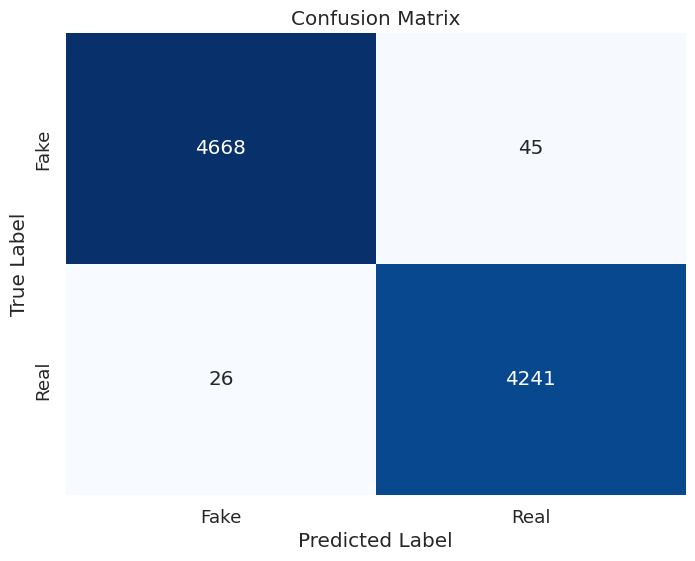

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred_test)

plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False,
            xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

##Naive Bayes- Jialene

In [ ]:
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   title    44898 non-null  object 
 1   text     44898 non-null  object 
 2   subject  44898 non-null  object 
 3   date     44898 non-null  object 
 4   label    44898 non-null  float64
dtypes: float64(1), object(4)
memory usage: 1.7+ MB


In [ ]:
X = news["text"]
y = news["label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
cv    = CountVectorizer(max_features=10000, stop_words='english')
X_train = cv.fit_transform(X_train)

tfidf = TfidfTransformer(use_idf=True)
X_train = tfidf.fit_transform(X_train)

In [ ]:
X_test = cv.transform(X_test)
X_test = tfidf.transform(X_test)

In [ ]:
NB_classifier = MultinomialNB()
NB_classifier = NB_classifier.fit(X_train, y_train)

In [ ]:
y.value_counts(normalize=True)

0.0    0.522985
1.0    0.477015
Name: label, dtype: float64

In [ ]:
y_pred_train = NB_classifier.predict(X_train)
print(metrics.accuracy_score(y_train, y_pred_train))

y_pred_test = NB_classifier.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred_test))

0.9358260482209477
0.9316258351893095


In [ ]:
print(metrics.classification_report(y_test, y_pred_test, zero_division=0))

              precision    recall  f1-score   support

         0.0       0.93      0.94      0.93      4684
         1.0       0.93      0.92      0.93      4296

    accuracy                           0.93      8980
   macro avg       0.93      0.93      0.93      8980
weighted avg       0.93      0.93      0.93      8980



In [ ]:
new_obs = ["The true story of a man who robbed a thousand banks."]

new_obs = cv.transform(new_obs)
new_obs = tfidf.transform(new_obs)
classifier.predict(new_obs)

array([0.])

## Ensemble model


In [ ]:
from sklearn.model_selection import GridSearchCV


In [ ]:
from sklearn.ensemble import VotingClassifier
#create a dictionary of our models
estimators=[('rnn', rnn), ('transformer', transformer), ('svm', SVM_classifier), ('nb', NB_classifier)]
#create our voting classifier, inputting our models
ensemble = VotingClassifier(estimators, voting='hard')


In [ ]:
#fit model to training data
ensemble.fit(X_train, y_train)
#test our model on the test data
ensemble.score(X_test, y_test)

#Testing new dataset
Find new dataset